# <font color=black> Analysis - FC-based parcellation using correlation </font>
<hr style="border:1px solid black">

In [9]:
import sys,json
import glob, os
import numpy as np
import nibabel as nib
from nilearn import datasets, plotting, image, surface
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from fc_based_parcellation_paper import FC_Parcellation

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialization
<hr style="border:0.5px solid black">

In [16]:
# Load the config file with all information
with open('../../config/config_fc_based_parcellation.json') as config_file:
    config = json.load(config_file)
# Define tag of this analysis (used for saving)
config['output_tag'] = "C1toC7_gm_to_iCAP_SMC"
# Note: paths should be with respect to main directory
config['file_tag']['spinalcord'] = "_task-rest_bold_stc_sc_moco_brsc_BP_inTemplate_s.nii.gz"
config['file_tag']['brain'] = "_task-rest_bold_stc_brain_moco_brsc_BP_reg_SPM_inTemplate2mm_s.nii.gz"
config['template']['spinalcord'] = "/templates/PAM50_hc_project/template/PAM50_t2.nii.gz"
config['spinal_levels'] = "/templates/PAM50_hc_project/template/PAM50_spinal_levels_C1C7.nii.gz"
config['masks']['source'] = "/templates/PAM50_hc_project/template/PAM50_gm_bin07_C1C7.nii.gz"
config['masks']['target'] = "/analysis/masks/brain/iCAPs_z_SMC_bin.nii.gz"

config['brain_surfaces']='/templates/surf/'

config['list_subjects'] = ["P030", "P099","A006","A007","A008","A009","A011","A013","A023","A024","A025","A026","A027","A028","A029","A030","A032","A033","A034","A036","A037","A038","A039","A043","A044","A045","A046","A048","A050","A051","A052"]

# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config)

/media/miplab-nas2/Data3/BMPD/hc_project//brain_spine/results/fc_parcellation/C1toC7_gm_to_iCAP_SMC/
An analysis with this tag has already been done - Loading configuration from existing file!


# Analyses
<hr style="border:0.5px solid black">

### Compute the voxelwise correlation profiles and their similarity 

In [7]:
# Loop through the subjects to compute fc 
for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
    print(f'\033[1mSUBJECT {sub}\033[0m')
    fc_parcellation.compute_voxelwise_fc(sub=sub, overwrite=False)

SUBJECT P030
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Computing correlation coefficient
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT P099
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Computing correlation coefficient
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A006
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Computing correlation coefficient
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A007
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Computing correlation coefficient
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT 

... Computing FC for all possibilities
... Computing correlation coefficient
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A051
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Computing correlation coefficient
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A052
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Computing correlation coefficient
... Fisher transforming correlations
... Computing similarity matrix

DONE
COMPUTE MEAN ACROSS PARTICIPANTS
Overwrite results = False
... Computing mean similarity matrix

DONE
... Operation performed in 858.98 s!


### Compute stability of similarity matrix across participants

In [10]:
fc_parcellation.stability_similarity(overwrite=False)

STABILITY ANALYSIS
Overwrite results = False
... Loading similarity matrices
... Computing stability across participants

DONE


### Compute mean similarity matrix across participants

In [22]:
fc_parcellation.compute_mean_fc_sim(overwrite=False)

COMPUTE MEAN ACROSS PARTICIPANTS
Overwrite results = False
... Computing mean FC
... Mean similarity matrix already computed

DONE


### Compute the clustering on the mean similarity matrix and generate corresponding maps

In [39]:
fc_parcellation.run_clustering(take_mean=True,sub=None, k_range=range(2,21), overwrite=False)

CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = range(2, 21)
Overwrite results = False
Clustering will be done on the mean across participants!
K = 2
... Labels already computed
K = 3
... Labels already computed
K = 4
... Labels already computed
K = 5
... Labels already computed
K = 6
... Labels already computed
K = 7
... Labels already computed
K = 8
... Labels already computed
K = 9
... Labels already computed
K = 10
... Labels already computed
K = 11
... Labels already computed
K = 12
... Labels already computed
K = 13
... Labels already computed
K = 14
... Labels already computed
K = 15
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 16
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 17
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 18
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 19
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 20
... Running agglomerative clustering




/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


### Generate image of the dendrogram for K = 7

In [29]:
fc_parcellation.plot_dendrogram(k_range=7)

PLOT DENDROGRAM
K value(s) = 7
Overwrite results = False
K = 7
... Image already exists




### Evaluate inter-participant stability

In [32]:
# Loop through the subjects to compute individual labels
for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
    print(f'\033[1mSUBJECT {sub}\033[0m')
    fc_parcellation.run_clustering(sub=sub, k_range=7, overwrite=False)

SUBJECT P030
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT P099
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A006
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A007
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A008
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A009
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A011
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A013
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A023
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A024
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A025
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A026
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A027
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A028
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A029
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A030
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A032
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A033
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A034
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A036
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A037
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A038
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A039
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A043
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A044
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A045
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A046
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A048
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A050
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A051
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)




SUBJECT A052
CLUSTERING AT THE INDIVIDUAL LEVEL
K value(s) = 7
Overwrite results = False
K = 7
... Loading similarity matrix from file
... Running agglomerative clustering




/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


In [33]:
# Obtain distribution maps
fc_parcellation.subject_variability(k_range=7)

RELABELING
K value(s) = 7
Overwrite results = False
K = 7
... Relabeling sub-P030
... Relabeling sub-P099
... Relabeling sub-A006
... Relabeling sub-A007
... Relabeling sub-A008
... Relabeling sub-A009
... Relabeling sub-A011
... Relabeling sub-A013
... Relabeling sub-A023
... Relabeling sub-A024
... Relabeling sub-A025
... Relabeling sub-A026
... Relabeling sub-A027
... Relabeling sub-A028
... Relabeling sub-A029
... Relabeling sub-A030
... Relabeling sub-A032
... Relabeling sub-A033
... Relabeling sub-A034
... Relabeling sub-A036
... Relabeling sub-A037
... Relabeling sub-A038
... Relabeling sub-A039
... Relabeling sub-A043
... Relabeling sub-A044
... Relabeling sub-A045
... Relabeling sub-A046
... Relabeling sub-A048
... Relabeling sub-A050
... Relabeling sub-A051
... Relabeling sub-A052
... Compute distribution for each K

DONE


### Compute target maps (i.e., corresponding brain maps)

In [23]:
fc_parcellation.generate_brain_maps(k=7, order=[7,6,4,2,5,3,1])

RUN WINNER-TAKES-ALL ANALYSIS
K value = 7
Overwrite results = False
K1 will have a value of 7
K2 will have a value of 6
K3 will have a value of 4
K4 will have a value of 2
K5 will have a value of 5
K6 will have a value of 3
K7 will have a value of 1
DONE



# Plotting
<hr style="border:0.5px solid black">

### Plot label maps (spinal cord)

RUN PLOTTING SPINAL MAPS
K value = 14
Save figure = True
The plotting is displayed in neurological orientation (Left > Right)


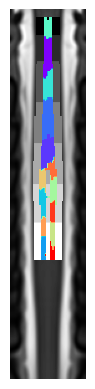

In [38]:
fc_parcellation.plot_spinal_map(k=7, order=[7,6,4,2,5,3,1], save_figure=True)

COMPUTE SIMILARITY WITH ATLAS FOR K=7
COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!
Mean Dice = 0.84
Std Dice = 0.08


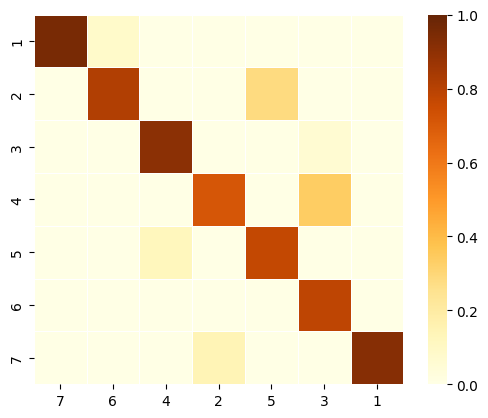

In [37]:
fc_parcellation.compute_similarity_spinal_levels(save_figure=True)

### Plot WTA maps (brain)

RUN PLOTTING BRAIN MAPS
K value = 7
Save figure = True


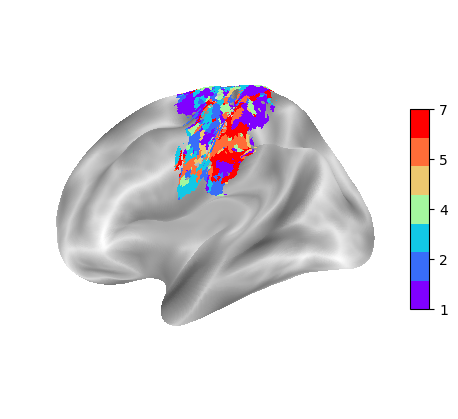

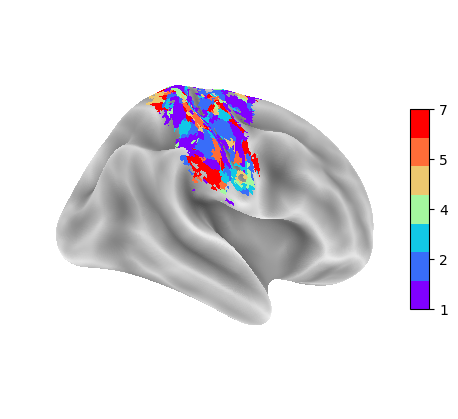

In [27]:
fc_parcellation.plot_brain_map(k=7, save_figure=True)